In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

plt.style.use("seaborn-v0_8-paper")

# colors =["#7c1d6f","#045275"]
colors = ["#ED4638", "#0A2C52"]

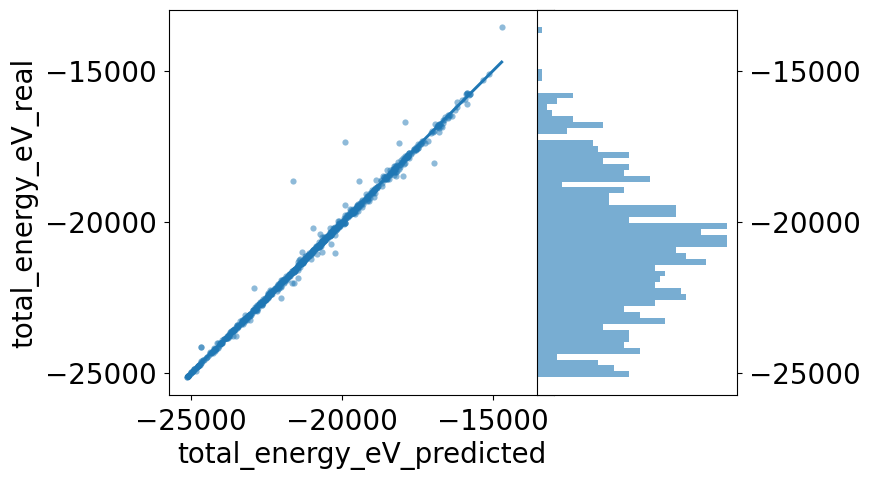

R2 fit 0.9936493312160682


In [2]:
target = "total_energy_eV"

df = pd.read_csv(
    f"/home/tom/git_workspace/GrapheNetDefectDetector/data/{target}_predictions.csv",
    header=0,
)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(10, 5), gridspec_kw={"width_ratios": [4, 1]}
)

# Plot the scatter plot on the left subplot
ax1.set_xlabel("EA (eV) - predicted", size=20)
ax1.set_ylabel("EA (eV) - true", size=20)

ax1.tick_params(axis="both", which="major", labelsize=20)

MAX = np.max([df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()])
MIN = np.min([df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()])

offset = 0.05 * np.abs(MAX - MIN)

bound = [MIN - offset, MAX + offset]
# ax1.axis('equal')
ax1.set_xlim(bound)
ax1.set_ylim(bound)
ax1.set_yticks([-15000, -20000, -25000])
ax1.set_box_aspect(1)

# Add y=x reference axis
sns.regplot(
    x=f"{target}_predicted",
    y=f"{target}_real",
    data=df,
    ax=ax1,
    scatter_kws={"s": 20, "alpha": 0.5},
)

# Plot the histogram on the right subplot
ax2.set_ylim(bound)
hist_data = df[f"{target}_real"]
ax2.hist(
    hist_data,
    orientation="horizontal",
    bins=round(2 * np.sqrt(len(hist_data))),
    linewidth=0,
    alpha=0.6,
)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.set_xticks([])
ax2.set_yticks([-15000, -20000, -25000])
ax2.yaxis.tick_right()
# Adjust the position of the subplots
fig.subplots_adjust(wspace=-0.45)

# Show the plot
plt.show()

print(f"R2 fit {r2_score(df[f'{target}_predicted'], df[f'{target}_real'])}")

<Figure size 1000x500 with 0 Axes>

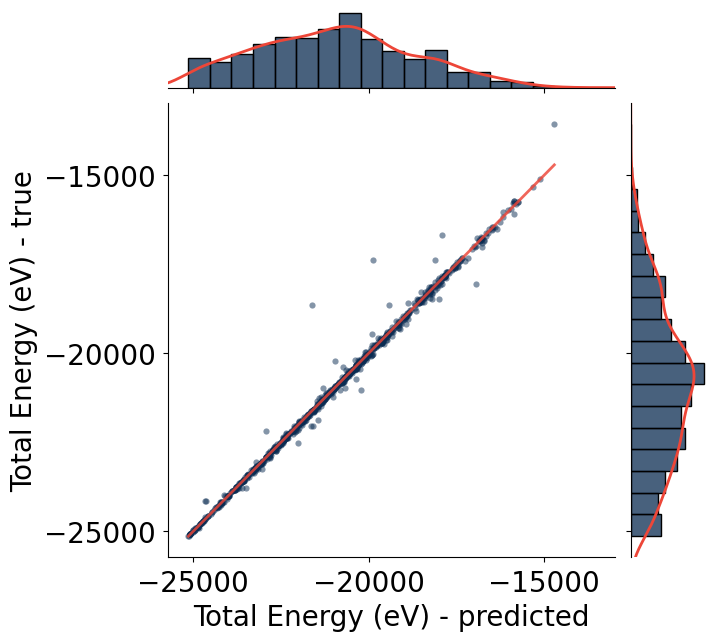

In [4]:
# colors =["#ED4638","#0A2C52"]
# colors = ["#CE4F38", "#1D5CAF"]
colors = ["#F0741E", "#276CB3"]
target_ticks = {
    "fermi_level_ev": [-5.55, -5.10, -4.66],
    "EA_ev": [-5.65, -5.25, -4.85],
    "IP_ev": [4.4, 4.9, 5.4],
    "band_gap_ev": [-11.2, -10.3, -9.4],
    "total_energy_eV": [-15000, -20000, -25000],
    "energy_per_atom": [-49.2, -48.8, -48.4],
}
target_labels = {
    "fermi_level_ev": ("Fermi Level [eV] - predicted", "Fermi Level[eV] - true"),
    "EA_ev": ("Electron Affinity [eV] - predicted", "Electron Affinity [eV] - true"),
    "IP_ev": (
        "Ionization Potential [eV] - predicted",
        "Ionization Potential [eV] - true",
    ),
    "band_gap_ev": ("Band Gap [eV] - predicted", "Band Gap [eV] - true"),
    "total_energy_eV": ("Total Energy (eV) - predicted", "Total Energy (eV) - true"),
    "energy_per_atom": (
        "Energy Per Atom (eV) - predicted",
        "Energy Per Atom (eV) - true",
    ),
}

for target in target_list:
    ticks = target_ticks[f"{target}"]
    df = pd.read_csv(
        f"/home/mario/Mario/Phd_code/GDD/GrapheNetDefectDetector/{target}_predictions.csv",
        header=0,
    )

    MAX = np.max(
        [df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()]
    )
    MIN = np.min(
        [df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()]
    )

    offset = 0.05 * np.abs(MAX - MIN)
    bound = [MIN - offset, MAX + offset]

    fig = plt.figure(figsize=(8, 8))

    g = sns.JointGrid()
    x, y = df[f"{target}_predicted"], df[f"{target}_real"]
    sns.regplot(
        x=f"{target}_predicted",
        y=f"{target}_real",
        data=df,
        ax=g.ax_joint,
        scatter_kws={"s": 40, "alpha": 0.5, "color": colors[1]},
        line_kws={"linewidth": 3, "alpha": 1, "color": colors[0]},
    )
    sns.histplot(
        x=x,
        fill=True,
        linewidth=1,
        kde=False,
        ax=g.ax_marg_x,
        stat="density",
        color=colors[1],
    )
    sns.kdeplot(x=x, linewidth=2, ax=g.ax_marg_x, color=colors[0])
    sns.histplot(
        y=y,
        fill=True,
        linewidth=1,
        kde=False,
        ax=g.ax_marg_y,
        stat="density",
        color=colors[1],
    )
    sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y, color=colors[0])
    g.ax_joint.set_xticks(ticks)
    g.ax_joint.set_yticks(ticks)
    g.ax_joint.set_xlim(bound)
    g.ax_joint.set_ylim(bound)
    g.ax_joint.tick_params(axis="both", which="major", labelsize=20)

    g.set_axis_labels(
        target_labels[f"{target}"][0], target_labels[f"{target}"][1], fontsize=20
    )

    plt.savefig(f"{target}.png", dpi=300, bbox_inches="tight")

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [24]:
# Carica il dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Aggiungi una colonna di 1 per l'intercetta
X = np.c_[np.ones(X.shape[0]), X]  # Aggiunge una colonna di 1's

# Dividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
def compute_ridge_gradient(X, y, beta, alpha):
    m = len(y)
    predictions = X @ beta
    errors = predictions - y
    gradient = (2/m) * (X.T @ errors) + 2 * alpha * beta
    return gradient
def gradient_descent_ridge(X, y, alpha, learning_rate, num_iterations):
    beta = np.zeros(X.shape[1])
    for _ in range(num_iterations):
        gradient = compute_ridge_gradient(X, y, beta, alpha)
        beta -= learning_rate * gradient
    return beta
def compute_lasso_gradient(X, y, beta, alpha):
    m = len(y)
    predictions = X @ beta
    errors = predictions - y
    gradient = (2/m) * (X.T @ errors) + alpha * np.sign(beta)
    return gradient
def gradient_descent_lasso(X, y, alpha, learning_rate, num_iterations):
    beta = np.zeros(X.shape[1])
    for _ in range(num_iterations):
        gradient = compute_lasso_gradient(X, y, beta, alpha)
        beta -= learning_rate * gradient
    return beta


In [29]:
# Parametri per Ridge
alpha_ridge = 1
learning_rate_ridge = 0.01
num_iterations_ridge = 1000

# Addestra il modello Ridge
beta_ridge = gradient_descent_ridge(X_train, y_train, alpha_ridge, learning_rate_ridge, num_iterations_ridge)

# Prevedi sui dati di test
y_pred_ridge = X_test @ beta_ridge

# Calcola l'errore quadratico medio
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')


Ridge Regression MSE: 10017.071870354543


In [27]:
# Parametri per Lasso
alpha_lasso = 1
learning_rate_lasso = 0.01
num_iterations_lasso = 1000

# Addestra il modello Lasso
beta_lasso = gradient_descent_lasso(X_train, y_train, alpha_lasso, learning_rate_lasso, num_iterations_lasso)

# Prevedi sui dati di test
y_pred_lasso = X_test @ beta_lasso

# Calcola l'errore quadratico medio
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')


Lasso Regression MSE: 5306.171371433827


In [28]:
print('Ridge Coefficients:')
print(beta_ridge)

print('Lasso Coefficients:')
print(beta_lasso)


Ridge Coefficients:
[ 1.39759117e+01  9.09444752e-02  5.15708365e-03  2.46653031e-01
  1.84163754e-01  6.63481024e-02  4.60671395e-02 -1.54321733e-01
  1.63234918e-01  2.22408258e-01  1.73293391e-01]
Lasso Coefficients:
[ 1.48736301e+02  3.04606733e-02  7.16869679e-02  3.50206176e-02
 -5.03653462e-02  2.54019178e-03 -1.66618177e-02 -6.50435010e-02
  1.45660184e-02  1.11640957e-01 -3.33018805e-02]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Carica il dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Aggiungi una colonna di 1 per l'intercetta
X = np.c_[np.ones(X.shape[0]), X]  # Aggiunge una colonna di 1's

# Dividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funzione di perdita Ridge
def ridge_loss(X, y, beta, alpha):
    m = len(y)
    predictions = X @ beta
    errors = predictions - y
    loss = (1/m) * np.sum(errors**2) + alpha * np.sum(beta[1:]**2)  # Penalizza solo i coefficienti
    return loss

# Funzione di perdita Lasso
def lasso_loss(X, y, beta, alpha):
    m = len(y)
    predictions = X @ beta
    errors = predictions - y
    loss = (1/m) * np.sum(errors**2) + alpha * np.sum(np.abs(beta[1:]))  # Penalizza solo i coefficienti
    return loss

# Parametri per Ridge e Lasso
alpha_ridge = 1.0
alpha_lasso = 0.1
num_points = 100
coeff_range = np.linspace(-10, 10, num_points)

# Creare una griglia di coefficienti
loss_values_ridge = np.zeros((num_points, num_points))
loss_values_lasso = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        beta_test = np.array([0, coeff_range[i], coeff_range[j]])
        loss_values_ridge[i, j] = ridge_loss(X_train, y_train, beta_test, alpha_ridge)
        loss_values_lasso[i, j] = lasso_loss(X_train, y_train, beta_test, alpha_lasso)

# Visualizzare la funzione di perdita Ridge
plt.figure(figsize=(12, 6))
plt.contourf(coeff_range, coeff_range, loss_values_ridge.T, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Ridge Regression Loss Function')
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.show()

# Visualizzare la funzione di perdita Lasso
plt.figure(figsize=(12, 6))
plt.contourf(coeff_range, coeff_range, loss_values_lasso.T, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Lasso Regression Loss Function')
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 11)

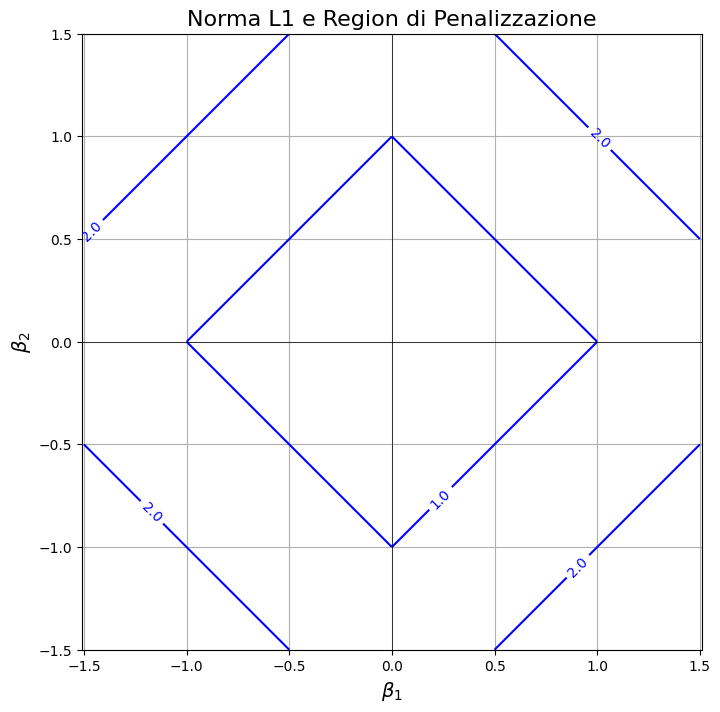

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della griglia di coefficienti
beta1 = np.linspace(-1.5, 1.5, 400)
beta2 = np.linspace(-1.5, 1.5, 400)
Beta1, Beta2 = np.meshgrid(beta1, beta2)

# Calcolo della norma L1
L1_norm = np.abs(Beta1) + np.abs(Beta2)

# Creazione della figura
plt.figure(figsize=(8, 8))

# Traccia le linee di contorno della norma L1
contour_levels = [1, 2, 3]  # Livelli di contorno per la norma L1
contours = plt.contour(Beta1, Beta2, L1_norm, levels=contour_levels, colors='b')

# Etichetta i contorni
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')

# Etichettatura e formattazione
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Norma L1 e Region di Penalizzazione', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Mostra la figura
plt.show()


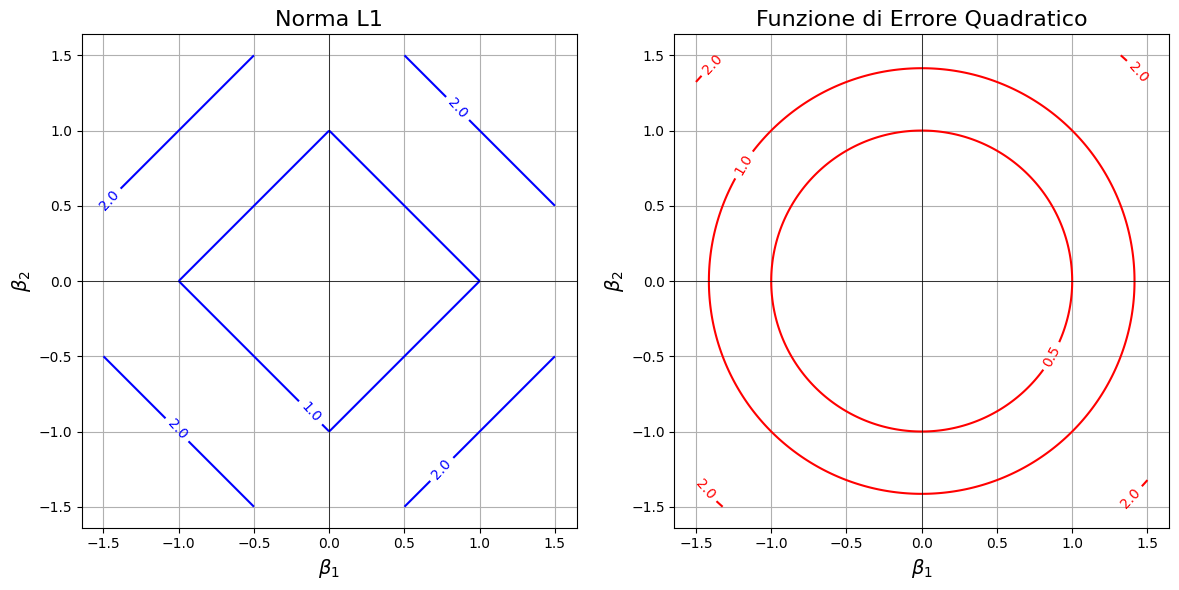

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della griglia di coefficienti
beta1 = np.linspace(-1.5, 1.5, 400)
beta2 = np.linspace(-1.5, 1.5, 400)
Beta1, Beta2 = np.meshgrid(beta1, beta2)

# Calcolo della norma L1
L1_norm = np.abs(Beta1) + np.abs(Beta2)

# Calcolo della funzione di errore quadratico
# Nota: la funzione di errore è simulata qui per visualizzazione
# In pratica, sarebbe calcolata come parte dell'ottimizzazione
error = (Beta1**2 + Beta2**2) / 2

# Creazione della figura
plt.figure(figsize=(12, 6))

# Traccia le linee di contorno della norma L1
plt.subplot(1, 2, 1)
contour_levels = [1, 2, 3]  # Livelli di contorno per la norma L1
contours = plt.contour(Beta1, Beta2, L1_norm, levels=contour_levels, colors='b')
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Norma L1', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Traccia le linee di contorno della funzione di errore
plt.subplot(1, 2, 2)
error_contours = plt.contour(Beta1, Beta2, error, levels=[0.5, 1, 2], colors='r')
plt.clabel(error_contours, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Funzione di Errore Quadratico', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Mostra la figura
plt.tight_layout()
plt.show()


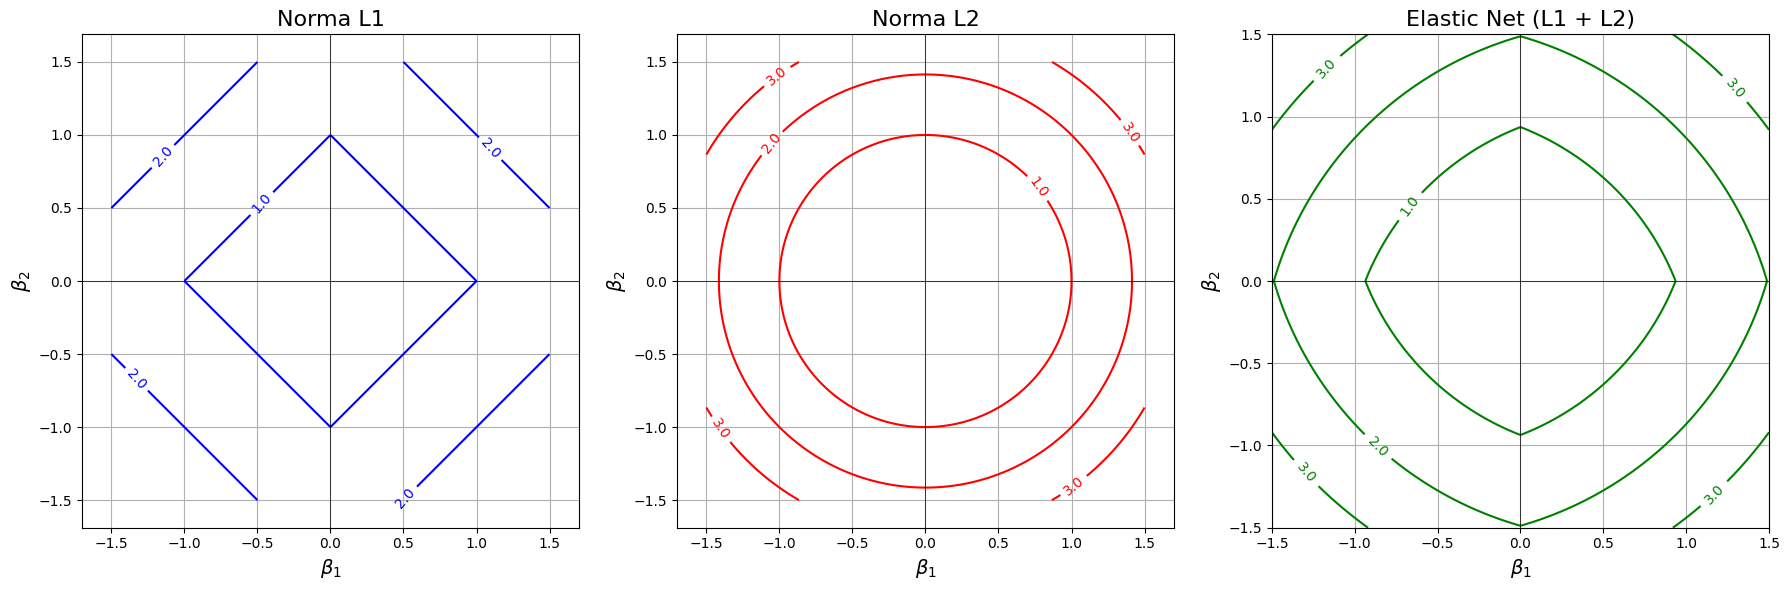

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della griglia di coefficienti
beta1 = np.linspace(-1.5, 1.5, 400)
beta2 = np.linspace(-1.5, 1.5, 400)
Beta1, Beta2 = np.meshgrid(beta1, beta2)

# Calcolo della norma L1
L1_norm = np.abs(Beta1) + np.abs(Beta2)

# Calcolo della norma L2
L2_norm = Beta1**2 + Beta2**2

# Calcolo della penalizzazione L1 + L2
alpha = 0.6
lambda_ = 1
Elastic_net_norm = alpha * L1_norm + 0.5 * lambda_ * L2_norm

# Creazione della figura
plt.figure(figsize=(18, 6))

# Penalizzazione L1
plt.subplot(1, 3, 1)
contour_levels = [1, 2, 3]  # Livelli di contorno per la norma L1
contours = plt.contour(Beta1, Beta2, L1_norm, levels=contour_levels, colors='b')
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Norma L1', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Penalizzazione L2
plt.subplot(1, 3, 2)
contour_levels = [1, 2, 3]  # Livelli di contorno per la norma L2
contours = plt.contour(Beta1, Beta2, L2_norm, levels=contour_levels, colors='r')
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Norma L2', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')

# Penalizzazione Elastic Net (L1 + L2)
plt.subplot(1, 3, 3)
contour_levels = [1, 2, 3]  # Livelli di contorno per Elastic Net
contours = plt.contour(Beta1, Beta2, Elastic_net_norm, levels=contour_levels, colors='g')
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Elastic Net (L1 + L2)', fontsize=16)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
#plt.axis('equal')

# Mostra la figura
plt.tight_layout()
plt.show()


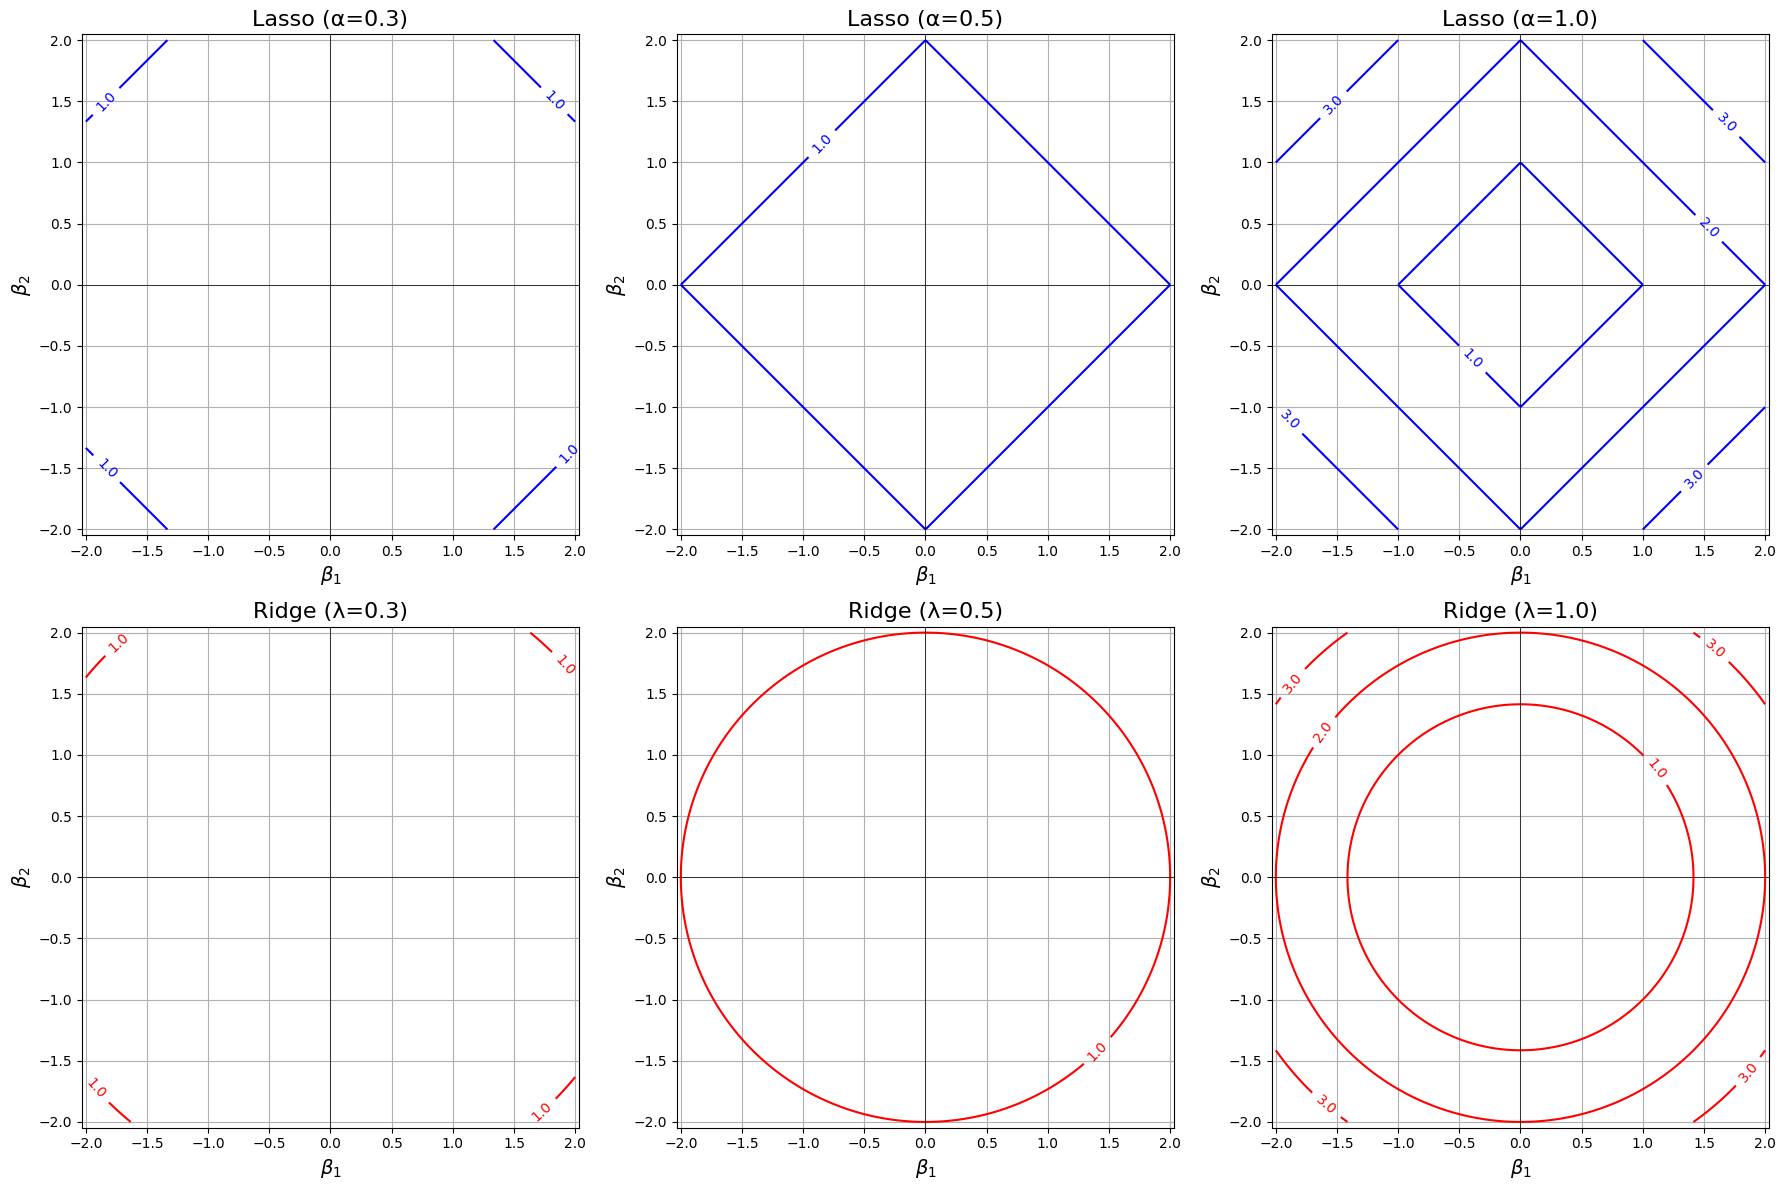

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della griglia di coefficienti
beta1 = np.linspace(-2, 2, 400)
beta2 = np.linspace(-2, 2, 400)
Beta1, Beta2 = np.meshgrid(beta1, beta2)

# Funzione di errore simulata
def error_function(Beta1, Beta2):
    return (Beta1**2 + Beta2**2) / 2

# Funzione per calcolare la norma L1
def lasso_norm(alpha, Beta1, Beta2):
    return alpha * (np.abs(Beta1) + np.abs(Beta2))

# Funzione per calcolare la norma L2
def ridge_norm(lambda_, Beta1, Beta2):
    return 0.5 * lambda_ * (Beta1**2 + Beta2**2)

# Parametri per la penalizzazione
alpha_values = [0.3, 0.5, 1.0]
lambda_values = [0.3, 0.5, 1.0]

# Creazione della figura
plt.figure(figsize=(18, 12))

# Penalizzazione Lasso
for i, alpha in enumerate(alpha_values):
    plt.subplot(2, len(alpha_values), i + 1)
    lasso_penalty = lasso_norm(alpha, Beta1, Beta2)
    contours = plt.contour(Beta1, Beta2, lasso_penalty, levels=[1, 2, 3], colors='b')
    plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
    plt.title(f'Lasso (α={alpha})', fontsize=16)
    plt.xlabel(r'$\beta_1$', fontsize=14)
    plt.ylabel(r'$\beta_2$', fontsize=14)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.axis('equal')

# Penalizzazione Ridge
for i, lambda_ in enumerate(lambda_values):
    plt.subplot(2, len(lambda_values), len(lambda_values) + i + 1)
    ridge_penalty = ridge_norm(lambda_, Beta1, Beta2)
    contours = plt.contour(Beta1, Beta2, ridge_penalty, levels=[1, 2, 3], colors='r')
    plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
    plt.title(f'Ridge (λ={lambda_})', fontsize=16)
    plt.xlabel(r'$\beta_1$', fontsize=14)
    plt.ylabel(r'$\beta_2$', fontsize=14)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.axis('equal')

plt.tight_layout()
plt.show()
